In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
df = pd.read_csv("C:\\Users\\abhis\\Downloads\\mail_data.csv")
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [63]:
# Column Descriptions.

#1) Category Column : The Category column represents the class label of each SMS message in the dataset and it contains two possible values: “ham” (legitimate message) and “spam” (unwanted or promotional message).
#2) This column is the target variable in a machine learning model.
#3) It helps the model learn how to distinguish between normal and spam messages.

#2) Message Column : The Message column contains the actual text content of each SMS and it is an unstructured text field with varying message lengths.
#2) This column serves as the input feature for spam detection models.

# EDA on this Dataset.

In [64]:
# Get the Quick Overview of the Dataset and Understand the structure of the Dataset.

print(df.shape)  # Rows and Columns of the Dataset.
print("Infornmation about the Dataset")
print(df.info()) # Complete Infornmation about the Columns of the Dataset.
print(df.columns) # Infornmation i.e. Names of the Columns about the Dataset.
print(df.head(5)) # Top 5 Rows of the Dataset.
print(df.tail(5)) # Last 5 Rows of the Dataset.
print(df.dtypes) # Getting Data - Types of each Column in the Dataset.
print(df.count())  # Count Non-Null Values in Each Column.
print(df.dtypes) #The Data - type of both the Column is object(String).
df.isnull().sum() # Checking Null - Values in the Dataset(It is clear from the Dataset, there are no Null - values in the dataset).
print(df['Category'].unique())

(5572, 2)
Infornmation about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
Index(['Category', 'Message'], dtype='object')
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
     Category                                            Message
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for th

In [65]:
# Checking for the Missing Vaues i.e. find out the Missing Values.

print(df.isnull()) # Null - Values in the form of Boolean Matrix(True - Missing Values , False - Not a mssing Values).
print(df.notnull()) # Opposite of isnull(True - Not a Missing Values , False - Missing Values)
print(df.isnull().sum()) # Count of the Missing Values of each Columns.
# By illustration, it is clear there are no missing values in any column in the Dataset.

      Category  Message
0        False    False
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
5567     False    False
5568     False    False
5569     False    False
5570     False    False
5571     False    False

[5572 rows x 2 columns]
      Category  Message
0         True     True
1         True     True
2         True     True
3         True     True
4         True     True
...        ...      ...
5567      True     True
5568      True     True
5569      True     True
5570      True     True
5571      True     True

[5572 rows x 2 columns]
Category    0
Message     0
dtype: int64


In [66]:
# Handling Duplicates in the Dataset.

print(df.duplicated())  # Reurns a Boolean series i.e. True denotes Duplicate Value and False denotes Not a Duplicate Value.
print(df.duplicated().sum()) # Sum of the Duplicate Values of the rows in the dataset(415 here).
df = df.drop_duplicates() #Dropping the Duplicate Rows in the Dataset.
print(df)

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool
415
     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5157 rows x 2 columns]


## Univariate Analysis 

## Category Column.

In [67]:
# Count values
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

## Bar Plot

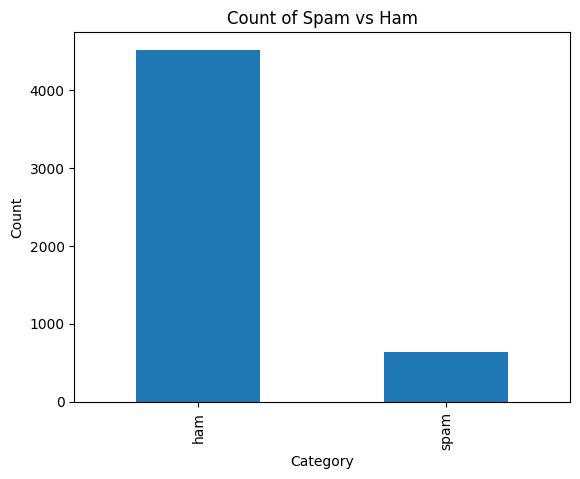

In [68]:
plt.figure()
df['Category'].value_counts().plot(kind='bar')
plt.title('Count of Spam vs Ham')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Pie Chart

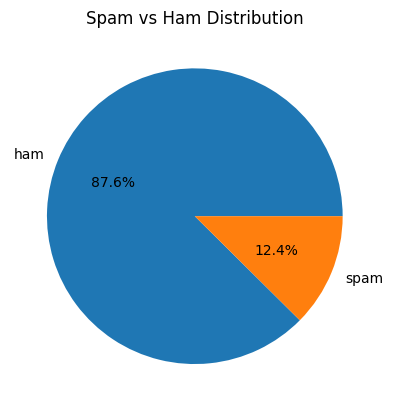

In [69]:
plt.figure()
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Spam vs Ham Distribution')
plt.ylabel('')
plt.show()

## Feature Engineering.

In [70]:
df['Category'] = df['Category'].str.strip().str.lower()

In [99]:
## Label Encoding.
#1)Label Encoding is a feature engineering technique used to convert categorical (text) data into numerical form so that machine learning models can process it.
#2)Here, we are converting Category column(String column) into Numeric Column(as Spam - as 0 and Ham(not spam - as 1).


In [72]:
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

In [86]:
df['Category'] = df['Category'].astype(int)

In [73]:
# separating the data as texts and label

X = df['Message'] #Texts.

Y = df['Category'] #Labels.

In [74]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object


In [75]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5157, dtype: object


## Splitting the data into training data & test data.

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [87]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [88]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(4125,)
(1032,)


In [89]:
print(Y_train.unique())
print(Y_train.dtype)
print(Y_train.isnull().sum())
print(type(Y_train.iloc[0]))

[1 0]
int32
0
<class 'numpy.int32'>


## Feature Extraction

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(
    min_df=1,
    stop_words='english',
    lowercase=True
)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [91]:
print(X_train)

1786                   I dun believe u. I thk u told him.
3576    And do you have any one that can teach me how ...
420     Send a logo 2 ur lover - 2 names joined by a h...
5156    Sir, I need Velusamy sir's date of birth and c...
3354    I emailed yifeng my part oredi.. Can ü get it ...
                              ...                        
809          I am taking half day leave bec i am not well
993     Up to ü... Ü wan come then come lor... But i d...
1726    You know there is. I shall speak to you in  &l...
3525    Yeah that'd pretty much be the best case scenario
1748                     I think u have the wrong number.
Name: Message, Length: 4125, dtype: object


print(X_train_features)

## Training the Model - Logistic Regression Model.

In [93]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

## Model Evaluation i.e. Prediction on the Training Data.

In [97]:
from sklearn.metrics import accuracy_score

# Training accuracy i.e. How well the model learned from the data it was trained on , here it means that Out of all the training emails, how many did the model classify correctly
train_prediction = model.predict(X_train_features)
training_accuracy = accuracy_score(Y_train, train_prediction)
print("Training Accuracy :", training_accuracy)

# Testing accuracy i.e. How well the model performs on new, unseen data.+
test_prediction = model.predict(X_test_features)
testing_accuracy = accuracy_score(Y_test, test_prediction)
print("Testing Accuracy :", testing_accuracy)

# So, as Training and testing Data are close to each other and close to 100% , so it is not the case of underfitting and Overfitting.

Training Accuracy : 0.961939393939394
Testing Accuracy : 0.9544573643410853


## Building a Predictive System.

In [104]:
input_mail1 = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_mail2 = ["You have WON $10,000 in our lucky draw. Click the link below to claim your prize NOW. Hurry! Offer valid for 24 hours only!"]

# convert text to feature vectors
input_data_features1 = feature_extraction.transform(input_mail1)
input_data_features2 = feature_extraction.transform(input_mail2)

# making prediction

prediction1 = model.predict(input_data_features1)
print(prediction1)

prediction2 = model.predict(input_data_features2)
print(prediction2)


# Output results
if prediction1[0] == 1:
    print("Mail 1: Ham mail")
else:
    print("Mail 1: Spam mail")

if prediction2[0] == 1:
    print("Mail 2: Ham mail")
else:
    print("Mail 2: Spam mail")

[1]
[0]
Mail 1: Ham mail
Mail 2: Spam mail
